In [1]:
# loading the libraries.
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
spark = SparkSession.builder.appName('empoyee_attrition').getOrCreate()


In [2]:
# Reading the data
emp = spark.read.csv('Datasets/Employee-Attrition.csv',header=True,inferSchema=True)
emp.cache()

DataFrame[Age: int, Attrition: string, BusinessTravel: string, DailyRate: int, Department: string, DistanceFromHome: int, Education: int, EducationField: string, EmployeeCount: int, EmployeeNumber: int, EnvironmentSatisfaction: int, Gender: string, HourlyRate: int, JobInvolvement: int, JobLevel: int, JobRole: string, JobSatisfaction: int, MaritalStatus: string, MonthlyIncome: int, MonthlyRate: int, NumCompaniesWorked: int, Over18: string, OverTime: string, PercentSalaryHike: int, PerformanceRating: int, RelationshipSatisfaction: int, StandardHours: int, StockOptionLevel: int, TotalWorkingYears: int, TrainingTimesLastYear: int, WorkLifeBalance: int, YearsAtCompany: int, YearsInCurrentRole: int, YearsSinceLastPromotion: int, YearsWithCurrManager: int]

In [3]:
# data exploration
# df.show() doesn't show the data cleanly.
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(emp.take(5), columns=emp.columns)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# visualising the schema at a high level data structure
emp.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

In [5]:
# checking missing values (count), mean, stddev
emp.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,1470,36.923809523809524,9.135373489136729,18,60
Attrition,1470,None,None,No,Yes
BusinessTravel,1470,None,None,Non-Travel,Travel_Rarely
DailyRate,1470,802.4857142857143,403.50909994352804,102,1499
Department,1470,None,None,Human Resources,Sales
DistanceFromHome,1470,9.19251700680272,8.10686443566608,1,29
Education,1470,2.912925170068027,1.0241649445978718,1,5
EducationField,1470,None,None,Human Resources,Technical Degree
EmployeeCount,1470,1.0,0.0,1,1


In [6]:
# We can use group by and count to find out how many data points we have for each class in our predictor.

emp.groupby('Attrition').count().toPandas()

,Attrition,count
0,No,1233
1,Yes,237


In [7]:
# List of problems: Resolve these problems
# Problmes found on comparing printschema and df.describe, using groupby
# 1. we can see some values none and comparing with the print schema we found that they are string values which need to be converted into integer
# 2. it is good we have no missing values. 
pdEmp = emp.toPandas()


In [8]:
# to know the rows and the column in dataset.
pdEmp.shape

(1470, 35)

In [9]:
# Reordering the dataset moving the targert variable "Attrition" to end.
#emp.head()
#emp.head()
X = pdEmp.pop('Attrition')
pdEmp['Attrition'] = X
pdEmp.head()



,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [10]:
# So, we have two main task 
# As we see in the data.head() below columns contains the same value and doesnot provide meaning to data.
# removing the columns which contains same values (“EmployeeCount”, “EmployeeNumber”, “Over18”, “StandardHours”) and are not useful.
pdEmp = pdEmp.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
pdEmp.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [11]:
pdEmp.shape

(1470, 31)

In [12]:
# Handling categorical variables.
# since we have only two unique values we can convert them to 0,1
pdEmp["Attrition"].unique()
pdEmp['Attrition'].value_counts()
pdEmp.loc[pdEmp['Attrition']=='No', 'Attrition'] = 0
pdEmp.loc[pdEmp['Attrition']=='Yes', 'Attrition'] = 1

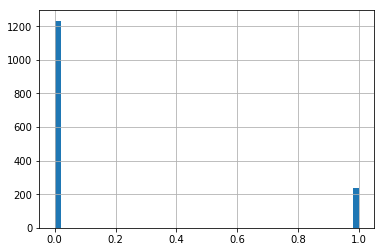

In [13]:
%matplotlib inline
pdEmp['Attrition'].hist(bins=50)

In [14]:
# checking other categorical variable
# we can see there are only 3 unique values exists variable
# convert categorical variables(“Gender”, “BusinessTravel”, “Department”, “EducationField”, “JobRole”, “MaritalStatus”, “OverTime”) to numerical
# catgorising the business travel by employee
pdEmp['BusinessTravel'].unique()
pdEmp['pdEmpb_Travel_Rarely']=0
pdEmp['pdEmpb_Travel_Frequently']=0
pdEmp['pdEmpb_Non-Travel']=0

pdEmp.loc[pdEmp['BusinessTravel']=='Travel_Rarely','pdEmpb_Travel_Rarely'] = 1
pdEmp.loc[pdEmp['BusinessTravel']=='Travel_Frequently','pdEmpb_Travel_Frequently'] = 1
pdEmp.loc[pdEmp['BusinessTravel']=='Non-Travel','pdEmpb_Non-Travel'] = 1

# converting the education field and categorising.
pdEmp['Life_Sciences']=0
pdEmp['Medical']=0
pdEmp['Marketing']=0
pdEmp['Technical_Degree']=0
pdEmp['Education_Human_Resources']=0
pdEmp['Education_Other']=0

pdEmp.loc[pdEmp['EducationField']=='Life Sciences','Life_Sciences'] = 1
pdEmp.loc[pdEmp['EducationField']=='Medical','Medical'] = 1
pdEmp.loc[pdEmp['EducationField']=='Other','Education_Other'] = 1
pdEmp.loc[pdEmp['EducationField']=='Technical Degree','Technical_Degree'] = 1
pdEmp.loc[pdEmp['EducationField']=='Human Resources','Education_Human_Resources'] = 1
pdEmp.loc[pdEmp['EducationField']=='Marketing','Marketing'] = 1
# converting the department field
pdEmp['pdEmp_Sales']=0
pdEmp['pdEmp_R&D']=0
pdEmp['pdEmp_Dept_Human_Resources'] =0

pdEmp.loc[pdEmp['Department']=='Sales','pdEmp_Sales'] = 1
pdEmp.loc[pdEmp['Department']=='Research & Development','pdEmp_R&D'] = 1
pdEmp.loc[pdEmp['Department']=='Human Resources','pdEmp_Dept_Human_Resources'] = 1

# converting Geneder values from categorical to numerical
pdEmp.loc[pdEmp['Gender']=='Male','Gender'] = 1
pdEmp.loc[pdEmp['Gender']=='Female','Gender'] = 0

# converting on the basis of job role values to numeric fields
pdEmp['Research_Scientist']=0
pdEmp['Laboratory_Technician']=0
pdEmp['Sales_Executive']=0
pdEmp['Manufacturing_Director']=0
pdEmp['Healthcare_Representative']=0
pdEmp['Sales_Representative']=0
pdEmp['Research_Director']=0
pdEmp['Manager'] = 0
pdEmp['Job_Human_Resources'] = 0

pdEmp.loc[pdEmp['JobRole']=='Research Scientist','Research_Scientist'] = 1
pdEmp.loc[pdEmp['JobRole']=='Laboratory Technician','Laboratory_Technician'] = 1
pdEmp.loc[pdEmp['JobRole']=='Sales Executive','Sales_Executive'] = 1
pdEmp.loc[pdEmp['JobRole']=='Sales Representative','Sales_Representative'] = 1
pdEmp.loc[pdEmp['JobRole']=='Manufacturing Director','Manufacturing_Director'] = 1
pdEmp.loc[pdEmp['JobRole']=='Healthcare Representative','Healthcare_Representative'] = 1
pdEmp.loc[pdEmp['JobRole']=='Research Director','Research_Director'] = 1
pdEmp.loc[pdEmp['JobRole']=='Manager','Manager'] = 1
pdEmp.loc[pdEmp['JobRole']=='Human Resources','Job_Human_Resources'] = 1
pdEmp.head()
# converting Marital Satus of pdEmployee
pdEmp['Marital_single']=0
pdEmp['Marital_married']=0
pdEmp['Marital_divorced']=0

pdEmp.loc[pdEmp['MaritalStatus']=='Married','Marital_married'] = 1
pdEmp.loc[pdEmp['MaritalStatus']=='Single','Marital_single'] = 1
pdEmp.loc[pdEmp['MaritalStatus']=='Divorced','Marital_divorced'] = 1

In [15]:
pdEmp['OverTime'].unique()
# converting OverTime values from categorical to numerical
pdEmp.loc[pdEmp['OverTime']=='Yes','OverTime'] = 1
pdEmp.loc[pdEmp['OverTime']=='No','OverTime'] = 0


In [16]:
# removing the the extra columns
pdEmp = pdEmp.drop(['BusinessTravel','EducationField',
                        'Department','JobRole','MaritalStatus'],axis=1)

In [17]:
pdEmp.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'pdEmpb_Travel_Rarely',
       'pdEmpb_Travel_Frequently', 'pdEmpb_Non-Travel', 'Life_Sciences',
       'Medical', 'Marketing', 'Technical_Degree', 'Education_Human_Resources',
       'Education_Other', 'pdEmp_Sales', 'pdEmp_R&D',
       'pdEmp_Dept_Human_Resources', 'Research_Scientist',
       'Laboratory_Technician', 'Sales_Executive', 'Manufacturing_Director',
       'Healthcare_Representative', 'Sales_Representative',
       'Research_Director', 'Manager', 

In [18]:
# confirm checking if all the columns are conveted to int.
pdEmp.dtypes

Age                           int64
DailyRate                     int64
DistanceFromHome              int64
Education                     int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Attrition                     int64
pdEmpb_Travel_Rarely          int64
pdEmpb_Travel_Frequently    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a825246d8>,
      dtype=object)

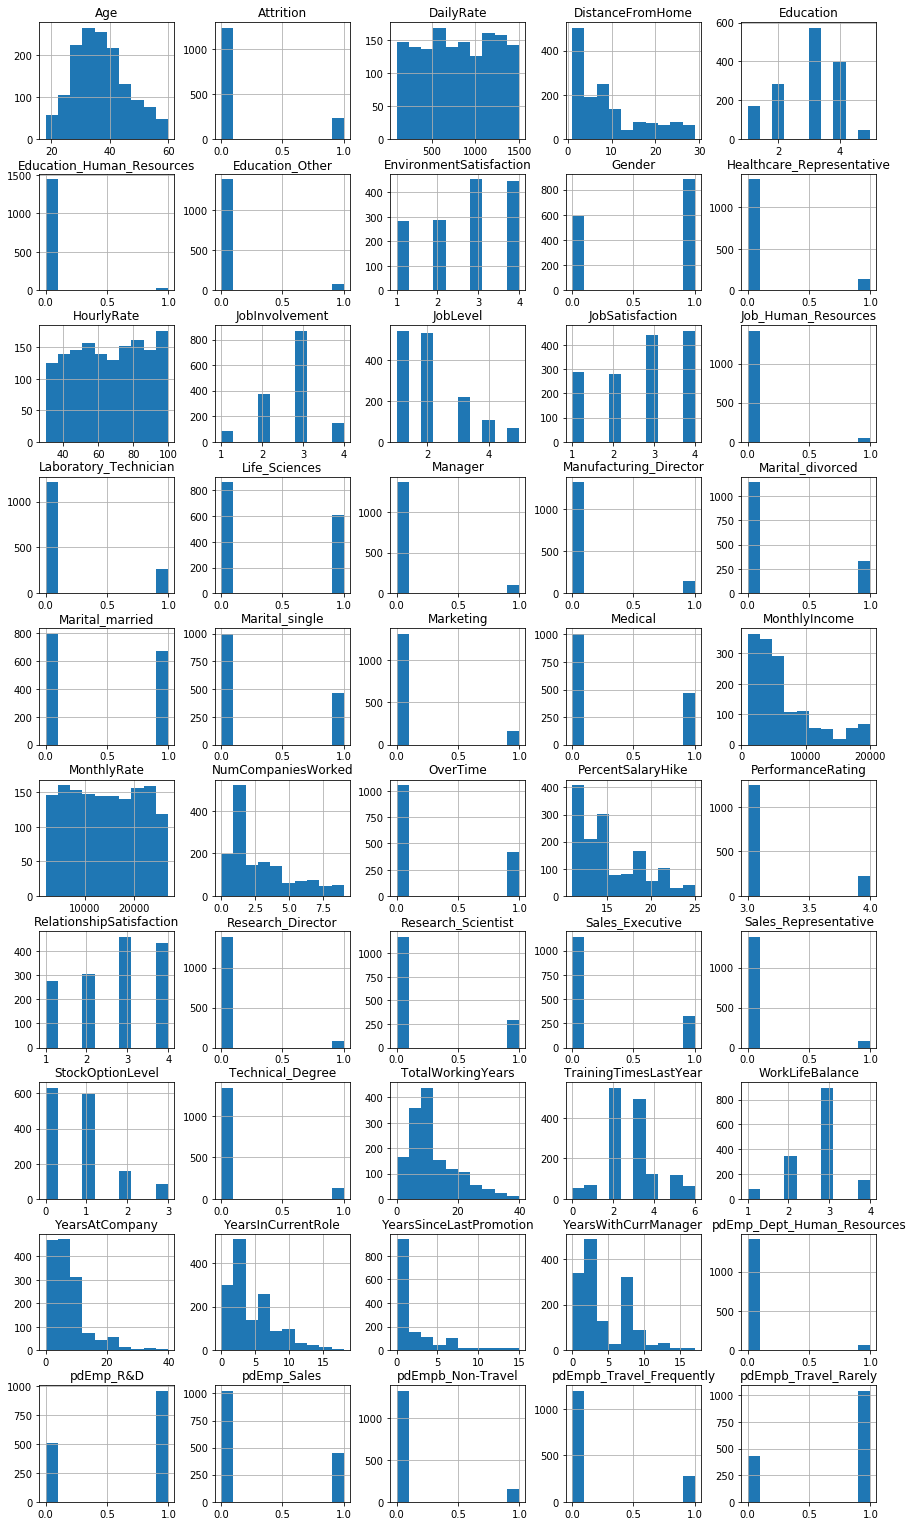

In [19]:
# checking the histogram for each variable.
# %matplotlib inline
pdEmp.hist(bins=10,figsize=(15,30), layout=(11,5))

Random Under-sampling
1    237
0    237
Name: Attrition, dtype: int64
Random over-sampling:
1    1233
0    1233
Name: Attrition, dtype: int64


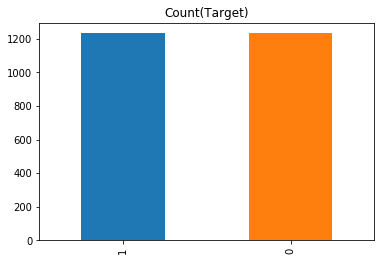

In [20]:
# Resampling the data as data is not evenly distributed.
count_class_1, count_class_2 = pdEmp['Attrition'].value_counts()
# Divide by class
pdEmp_class_1 = pdEmp[pdEmp['Attrition'] == 0]
pdEmp_class_2 = pdEmp[pdEmp['Attrition'] == 1]
pdEmp_class_2.describe()

# Random under-smapling
pdEmp_class_1_under = pdEmp_class_1.sample(count_class_2)
pdEmp_class_1_under_data = pd.concat([pdEmp_class_1_under, pdEmp_class_2],axis=0)
print("Random Under-sampling")
print(pdEmp_class_1_under_data.Attrition.value_counts())




# Random over-sampling
pdEmp_class_2_over = pdEmp_class_2.sample(count_class_1, replace=True)
pdEmp_class_2_over_data = pd.concat([pdEmp_class_1, pdEmp_class_2_over], axis=0)

print('Random over-sampling:')
print(pdEmp_class_2_over_data.Attrition.value_counts())

pdEmp_class_2_over_data.Attrition.value_counts().plot(kind='bar', title='Count(Target)')

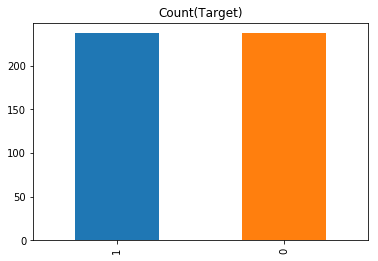

In [21]:
pdEmp_class_1_under_data.Attrition.value_counts().plot(kind='bar', title='Count(Target)')

In [22]:
# Now checking co-relation matrix to reduce the data.
pdEmp_class_1_under_data.corr()



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.020782,0.010667,0.197464,-0.006998,0.026263,0.021728,0.088923,0.532113,0.030055,...,0.114599,0.081269,0.095754,-0.208409,0.210486,2.706768e-01,-0.017171,-0.205946,0.139606,0.079372
DailyRate,0.020782,1.000000,-0.046597,-0.002369,-0.036820,-0.000209,0.091176,0.047091,0.017841,-0.017817,...,-0.014679,-0.001623,0.069504,0.024004,0.015942,2.052947e-02,-0.069070,-0.084584,0.054578,0.035939
DistanceFromHome,0.010667,-0.046597,1.000000,0.066232,-0.007392,-0.008581,-0.007905,0.007348,0.028445,-0.013592,...,0.049321,-0.014294,0.080331,-0.030605,-0.069940,-3.134489e-03,-0.011921,-0.047620,0.062927,-0.018733
Education,0.197464,-0.002369,0.066232,1.000000,-0.013095,0.003699,0.027100,0.127211,0.099575,-0.033032,...,0.084650,0.094345,-0.043782,-0.123187,0.048448,-1.790724e-02,0.028861,-0.076358,0.046724,0.035525
EnvironmentSatisfaction,-0.006998,-0.036820,-0.007392,-0.013095,1.000000,0.016495,-0.060113,0.029254,0.011732,0.015981,...,-0.046791,0.026480,0.099641,0.010872,0.031782,-2.627066e-02,-0.025097,0.030795,-0.047381,0.020207
Gender,0.026263,-0.000209,-0.008581,0.003699,0.016495,1.000000,0.046535,0.019792,-0.018114,0.016299,...,0.019344,-0.060405,0.014697,-0.062436,-0.054925,-7.554327e-04,0.004461,-0.004862,-0.009350,0.017177
HourlyRate,0.021728,0.091176,-0.007905,0.027100,-0.060113,0.046535,1.000000,0.004114,-0.006006,-0.085010,...,-0.018079,-0.001580,0.020801,-0.014771,-0.013670,-5.400361e-02,-0.043606,0.027280,-0.029727,0.003081
JobInvolvement,0.088923,0.047091,0.007348,0.127211,0.029254,0.019792,0.004114,1.000000,0.032038,-0.036169,...,-0.008727,-0.001844,0.073440,-0.036538,0.036813,2.106300e-03,0.018686,-0.045833,0.066155,-0.024795
JobLevel,0.532113,0.017841,0.028445,0.099575,0.011732,-0.018114,-0.006006,0.032038,1.000000,0.061219,...,0.241591,0.115529,0.188288,-0.250782,0.436022,4.942306e-01,-0.090379,-0.160833,0.124830,0.042859
JobSatisfaction,0.030055,-0.017817,-0.013592,-0.033032,0.015981,0.016299,-0.085010,-0.036169,0.061219,1.000000,...,-0.006806,-0.037050,0.105570,0.001519,0.039876,2.305790e-02,-0.018652,-0.026869,-0.028933,0.067409


In [23]:
pdEmp_class_2_over_data.corr()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.019080,-0.019331,0.177069,0.008376,0.000924,0.059340,0.067857,0.510775,0.035674,...,0.073146,0.087532,0.103502,-0.200831,0.177281,0.276073,-0.052307,-0.173592,0.120889,0.062940
DailyRate,0.019080,1.000000,-0.033155,-0.017586,0.027227,0.021145,0.053244,0.071236,0.003804,0.024632,...,-0.019040,0.003687,0.022811,-0.016044,0.006557,-0.000926,-0.014983,-0.059455,0.031174,0.034341
DistanceFromHome,-0.019331,-0.033155,1.000000,0.004581,-0.025092,-0.007980,0.018994,0.008155,0.008486,-0.045178,...,0.069742,-0.027770,0.045936,-0.054766,-0.031657,-0.042083,0.025168,-0.033262,0.029838,0.003720
Education,0.177069,-0.017586,0.004581,1.000000,-0.049315,0.011357,0.008184,0.089724,0.097538,-0.027487,...,0.080781,0.047293,-0.000519,-0.111970,0.049616,0.000529,0.012375,-0.052173,0.020087,0.039217
EnvironmentSatisfaction,0.008376,0.027227,-0.025092,-0.049315,1.000000,0.014386,-0.027926,0.046410,-0.015265,0.009948,...,-0.020843,0.060693,-0.024183,0.063183,-0.017534,0.002015,-0.027790,-0.007204,0.018158,-0.013809
Gender,0.000924,0.021145,-0.007980,0.011357,0.014386,1.000000,0.002711,0.012020,-0.024223,0.050881,...,0.004043,-0.059001,0.005439,-0.085897,-0.011968,-0.026706,-0.008715,-0.047017,0.004267,0.052630
HourlyRate,0.059340,0.053244,0.018994,0.008184,-0.027926,0.002711,1.000000,0.062925,-0.012233,-0.096282,...,-0.051988,0.005241,0.032618,-0.028022,-0.029378,0.017964,-0.032455,0.047306,-0.005983,-0.050843
JobInvolvement,0.067857,0.071236,0.008155,0.089724,0.046410,0.012020,0.062925,1.000000,0.013573,-0.026133,...,-0.038296,0.028956,0.032127,-0.030528,0.037126,0.018101,-0.020020,-0.042223,0.028411,0.016549
JobLevel,0.510775,0.003804,0.008486,0.097538,-0.015265,-0.024223,-0.012233,0.013573,1.000000,0.026370,...,0.258281,0.151460,0.171915,-0.243109,0.375622,0.512867,-0.091198,-0.130161,0.115576,0.016037
JobSatisfaction,0.035674,0.024632,-0.045178,-0.027487,0.009948,0.050881,-0.096282,-0.026133,0.026370,1.000000,...,0.026982,-0.006571,0.037518,-0.009711,0.010916,0.009505,-0.052621,-0.018911,0.002776,0.019844


In [24]:
pdEmp.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Sales_Executive,Manufacturing_Director,Healthcare_Representative,Sales_Representative,Research_Director,Manager,Job_Human_Resources,Marital_single,Marital_married,Marital_divorced
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.004892,...,-0.002001,0.049726,0.098825,-0.175785,0.185891,0.294248,-0.029856,-0.119185,0.083919,0.033120
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,0.030571,...,-0.000513,-0.005302,0.040141,0.005375,-0.000021,-0.013224,-0.021156,-0.075835,0.040035,0.037080
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.003669,...,0.030761,0.011848,0.022916,-0.015994,-0.022351,-0.039190,-0.024089,-0.027445,0.030232,-0.005440
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011296,...,0.053398,-0.005290,0.024270,-0.091465,0.049694,0.028453,-0.005295,0.004168,-0.001865,-0.002439
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.006784,...,-0.024421,0.059178,0.014090,0.002949,-0.048689,0.010730,-0.022014,0.009035,-0.022180,0.016439
Gender,-0.036311,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,0.033252,...,-0.005348,-0.065197,0.006823,-0.028877,-0.006121,-0.033880,0.036082,-0.032752,-0.007804,0.046076
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.071335,...,-0.011886,-0.014394,0.014599,-0.018703,-0.025128,0.012659,-0.016189,-0.033436,0.036432,-0.006150
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,-0.021476,...,-0.011413,-0.021939,0.001272,-0.027282,0.015200,0.017112,-0.004952,-0.045253,0.028324,0.016815
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,-0.001944,...,0.127490,0.114896,0.115704,-0.216559,0.414319,0.552744,-0.100922,-0.087072,0.050547,0.037087
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,-0.001944,1.000000,...,0.012604,-0.013747,0.016367,0.001413,-0.006217,-0.005620,-0.029681,0.024571,-0.010315,-0.015197


In [25]:
pdEmp.corr().loc['Attrition']
# though we have seen the correlation and 

Age                          -0.159205
DailyRate                    -0.056652
DistanceFromHome              0.077924
Education                    -0.031373
EnvironmentSatisfaction      -0.103369
Gender                        0.029453
HourlyRate                   -0.006846
JobInvolvement               -0.130016
JobLevel                     -0.169105
JobSatisfaction              -0.103481
MonthlyIncome                -0.159840
MonthlyRate                   0.015170
NumCompaniesWorked            0.043494
OverTime                      0.246118
PercentSalaryHike            -0.013478
PerformanceRating             0.002889
RelationshipSatisfaction     -0.045872
StockOptionLevel             -0.137145
TotalWorkingYears            -0.171063
TrainingTimesLastYear        -0.059478
WorkLifeBalance              -0.063939
YearsAtCompany               -0.134392
YearsInCurrentRole           -0.160545
YearsSinceLastPromotion      -0.033019
YearsWithCurrManager         -0.156199
Attrition                

In [26]:
# As we can see there few variable which has the positive relation with target class.
# for now we will be working with all variables
# converting explored data in data frames.
emp_under = spark.createDataFrame(pdEmp_class_1_under_data)
emp_over = spark.createDataFrame(pdEmp_class_2_over_data)
emp_normal = spark.createDataFrame(pdEmp)

In [27]:
col_names = emp_normal.schema.names
col_names.remove("Attrition")
print(*col_names, sep = ", ")

Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, pdEmpb_Travel_Rarely, pdEmpb_Travel_Frequently, pdEmpb_Non-Travel, Life_Sciences, Medical, Marketing, Technical_Degree, Education_Human_Resources, Education_Other, pdEmp_Sales, pdEmp_R&D, pdEmp_Dept_Human_Resources, Research_Scientist, Laboratory_Technician, Sales_Executive, Manufacturing_Director, Healthcare_Representative, Sales_Representative, Research_Director, Manager, Job_Human_Resources, Marital_single, Marital_married, Marital_divorced


In [28]:
# Preparing data for machine learning. We need only two columns only - features and label
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import numpy as np

In [29]:
vassembler = VectorAssembler(inputCols=col_names, outputCol="features")
vassembler_emp_under = vassembler.transform(emp_under)
vassembler_emp_over = vassembler.transform(emp_over)
vassembler_emp_normal = vassembler.transform(emp_normal)

vassembler_emp_under = vassembler_emp_under.select(['features', 'Attrition'])
vassembler_emp_over = vassembler_emp_over.select(['features', 'Attrition'])
vassembler_emp_normal = vassembler_emp_normal.select(['features', 'Attrition'])
vassembler_emp_under.show(3)
vassembler_emp_over.show(3)
vassembler_emp_normal.show(3)

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,6,...|        0|
|(49,[0,1,2,3,4,6,...|        0|
|(49,[0,1,2,3,4,5,...|        0|
+--------------------+---------+
only showing top 3 rows

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,5,...|        0|
|(49,[0,1,2,3,4,6,...|        0|
|(49,[0,1,2,3,4,5,...|        0|
+--------------------+---------+
only showing top 3 rows

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(49,[0,1,2,3,4,6,...|        1|
|(49,[0,1,2,3,4,5,...|        0|
|(49,[0,1,2,3,4,5,...|        1|
+--------------------+---------+
only showing top 3 rows



In [30]:
def linear_regression(data, splitfrac = [0.7,0.3]):
    train_data,test_data = data.randomSplit(splitfrac)
    # Let's see our training data.
    train_data.describe().show()

    # And our testing data.
    test_data.describe().show()

    lr = LinearRegression(featuresCol='features', labelCol='Attrition')
    
    # Fit the training data.
    lr_model = lr.fit(train_data)

    # Print the coefficients.
    #print("Coefficients: " + str(lr_model.coefficients))

    # Print the intercept.
    #print("Intercept: " + str(lr_model.intercept) + "\n")

    # Summarise the model and print out some evaluation metrics.
    training_summary = lr_model.summary
    print ("\n Training Results")
    # Print RMSE. 
    print("RMSE on training data: " + str(training_summary.rootMeanSquaredError))

    # Print R2.
    print("R2: " + str(training_summary.r2))

    # Let's evaluate the model against the test data.
    test_results = lr_model.evaluate(test_data)

    # And print the RMSE/R2. As expected, our RMSE and R2 are slightly worse when applying the testing set.
    print ("\n Test Results")
    print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
    print("R2 on test data: " + str(test_results.r2))

In [31]:
linear_regression(vassembler_emp_under, splitfrac = [0.7,0.3])
linear_regression(vassembler_emp_over, splitfrac = [0.6,0.4])
linear_regression(vassembler_emp_normal, splitfrac = [0.6,0.4])

+-------+-----------------+
|summary|        Attrition|
+-------+-----------------+
|  count|              331|
|   mean|0.513595166163142|
| stddev|  0.5005718601041|
|    min|                0|
|    max|                1|
+-------+-----------------+

+-------+-------------------+
|summary|          Attrition|
+-------+-------------------+
|  count|                143|
|   mean|0.46853146853146854|
| stddev| 0.5007627394144419|
|    min|                  0|
|    max|                  1|
+-------+-------------------+


 Training Results
RMSE on training data: 0.39149055716171305
R2: 0.3864869957540924

 Test Results
RMSE on test data: 0.4119499931205286
R2 on test data: 0.3184892984254436
+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|              1497|
|   mean|0.5003340013360054|
| stddev|0.5001669727880906|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+-------------------+
|summary| 

In [32]:
def binomial_logistic_regression(data, splitfrac = [0.7,0.3], beta_coffecient = False, roc= False, precision_recall= False):
    # Split our data. Note that the new DataFrame is being used.
    #print('\n'.join(map(str, splitfrac))) 
    train_data, test_data = data.randomSplit(splitfrac)
    print("Training Dataset Count: " + str(train_data.count()))
    print("Test Dataset Count: " + str(test_data.count()))

    # Instantiate the model.
    lr_model = LogisticRegression(featuresCol='features',labelCol='Attrition')

    # Fit the model.
    lr_model = lr_model.fit(train_data)
    training_summary = lr_model.summary
    # And evaluate the model using the test data.
    results = lr_model.transform(test_data)
    if beta_coffecient:
        # Visualising the coefficients. Sort from lowest to highest.
        beta = np.sort(lr_model.coefficients)
        # Plot the data.
        plt.plot(beta)
        # Add a label to the data.
        plt.ylabel('Beta Coefficients')
        # Show the graph. 
        plt.show()
        
    if roc :
        # Convert DataFrame to Pandas DataFrame.
        # Convert the DataFrame to a Pandas DataFrame.
        ROC = training_summary.roc.toPandas()

        # Plot the true positive and false positive rates.
        plt.plot(ROC['FPR'],ROC['TPR'])

        # Define the labels.
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC Curve')
        plt.show()

        # Print the AUC statistic. 
        print('Area Under the Curve: ' + str(training_summary.areaUnderROC))
    if precision_recall:
        # Convert DataFrame to Pandas DataFrame.
        pr = training_summary.pr.toPandas()
        # Plot model recall and precision.
        plt.plot(pr['recall'],pr['precision'])
        # Define the labels and show the graph. 
        plt.ylabel('Precision')
        plt.xlabel('Recall')
        plt.show()

Training Dataset Count: 291
Test Dataset Count: 183


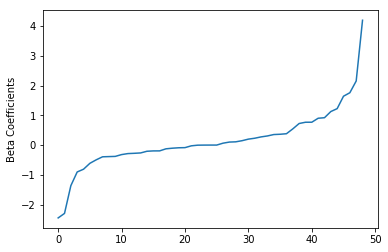

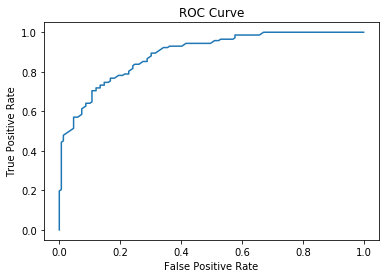

Area Under the Curve: 0.8909159655922112


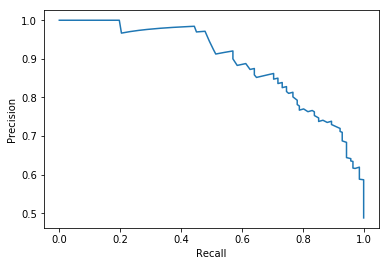

Training Dataset Count: 1454
Test Dataset Count: 1012


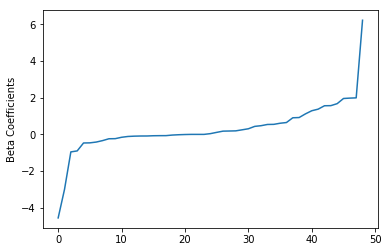

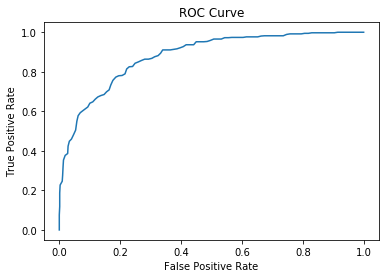

Area Under the Curve: 0.8799119821239705


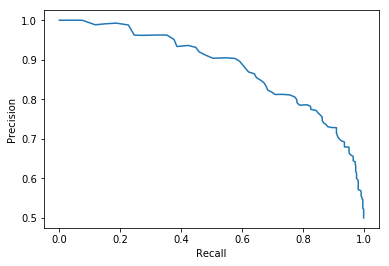

Training Dataset Count: 871
Test Dataset Count: 599


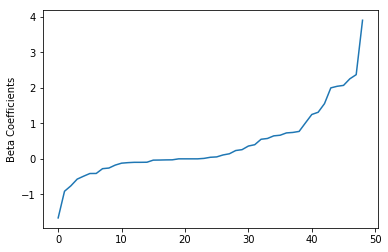

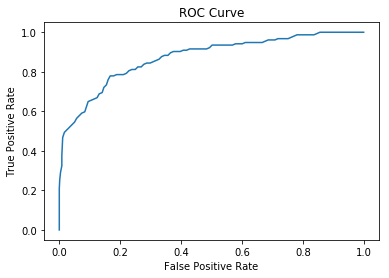

Area Under the Curve: 0.8724302197105541


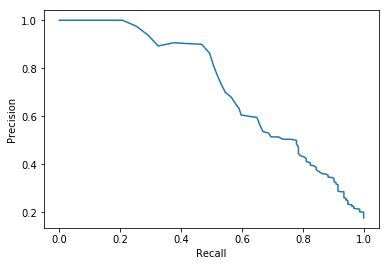

In [33]:
binomial_logistic_regression(vassembler_emp_under, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_over, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)


In [34]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns = vassembler.transform(emp_normal)
vemp_normal_corr_columns = vemp_normal_corr_columns.select(['features', 'Attrition'])
vemp_normal_corr_columns.show(3)


+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(15,[0,1,2,3,8,11...|        1|
|(15,[0,1,3,4],[24...|        0|
|(15,[0,1,2,3,10,1...|        1|
+--------------------+---------+
only showing top 3 rows



Training Dataset Count: 884
Test Dataset Count: 586


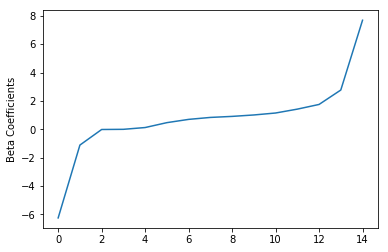

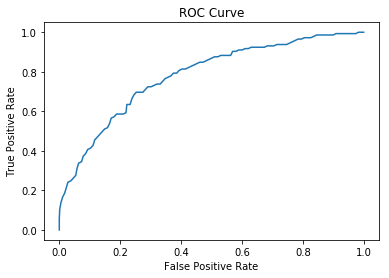

Area Under the Curve: 0.7795763146843363


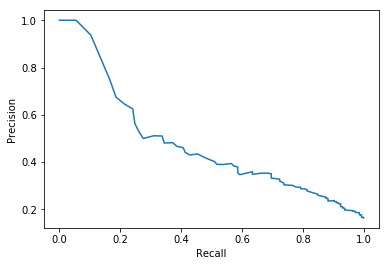

In [35]:
binomial_logistic_regression(vemp_normal_corr_columns, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)

In [36]:
linear_regression(vemp_normal_corr_columns, splitfrac = [0.7,0.3])

+-------+-------------------+
|summary|          Attrition|
+-------+-------------------+
|  count|               1055|
|   mean|0.15450236966824646|
| stddev|0.36160105936362985|
|    min|                  0|
|    max|                  1|
+-------+-------------------+

+-------+-------------------+
|summary|          Attrition|
+-------+-------------------+
|  count|                415|
|   mean| 0.1783132530120482|
| stddev|0.38323823419330816|
|    min|                  0|
|    max|                  1|
+-------+-------------------+


 Training Results
RMSE on training data: 0.3310911984109413
R2: 0.16083428479530526

 Test Results
RMSE on test data: 0.35160321651153587
R2 on test data: 0.15624613834290435


+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(15,[0,2,3,8,11],...|        0|
|(15,[0,1,2,3,4,14...|        0|
|(15,[0,3,8,11],[1...|        0|
+--------------------+---------+
only showing top 3 rows

Training Dataset Count: 293
Test Dataset Count: 181


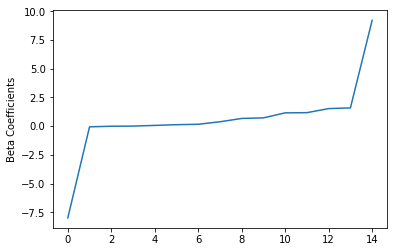

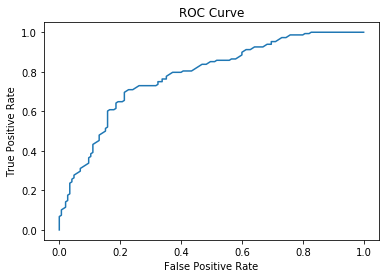

Area Under the Curve: 0.7821994408201304


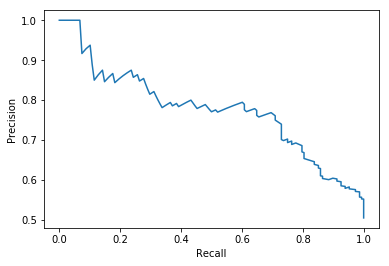

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               337|
|   mean|0.5044510385756676|
| stddev|0.5007236532371131|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+-------------------+
|summary|          Attrition|
+-------+-------------------+
|  count|                137|
|   mean|0.48905109489051096|
| stddev| 0.5017145356786988|
|    min|                  0|
|    max|                  1|
+-------+-------------------+


 Training Results
RMSE on training data: 0.4338758450409671
R2: 0.24694732721164847

 Test Results
RMSE on test data: 0.4491019925874725
R2 on test data: 0.1928425576474646


In [37]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns_under = vassembler.transform(emp_under)
vemp_normal_corr_columns_under = vemp_normal_corr_columns_under.select(['features', 'Attrition'])
vemp_normal_corr_columns_under.show(3)

binomial_logistic_regression(vemp_normal_corr_columns_under, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
linear_regression(vemp_normal_corr_columns_under, splitfrac = [0.7,0.3])

+--------------------+---------+
|            features|Attrition|
+--------------------+---------+
|(15,[0,1,3,4],[24...|        0|
|(15,[0,1,2,3,4],[...|        0|
|(15,[0,1,3,10],[1...|        0|
+--------------------+---------+
only showing top 3 rows

Training Dataset Count: 1536
Test Dataset Count: 930


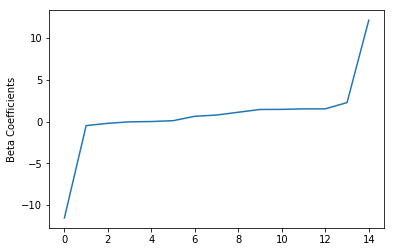

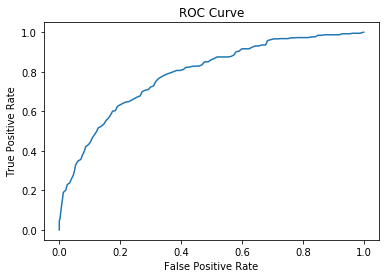

Area Under the Curve: 0.7877602753662508


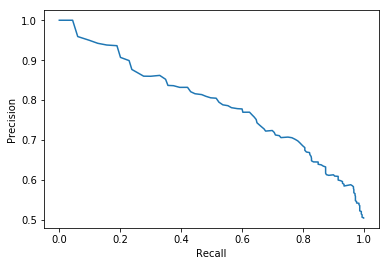

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|              1746|
|   mean| 0.497709049255441|
| stddev|0.5001379959697322|
|    min|                 0|
|    max|                 1|
+-------+------------------+

+-------+------------------+
|summary|         Attrition|
+-------+------------------+
|  count|               720|
|   mean|0.5055555555555555|
| stddev| 0.500316697724495|
|    min|                 0|
|    max|                 1|
+-------+------------------+


 Training Results
RMSE on training data: 0.4371798450567394
R2: 0.23547908208916413

 Test Results
RMSE on test data: 0.4326480323825166
R2 on test data: 0.2511702721876028


In [38]:
vassembler = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
vemp_normal_corr_columns_over = vassembler.transform(emp_over)
vemp_normal_corr_columns_over = vemp_normal_corr_columns_over.select(['features', 'Attrition'])
vemp_normal_corr_columns_over.show(3)

binomial_logistic_regression(vemp_normal_corr_columns_over, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
linear_regression(vemp_normal_corr_columns_over, splitfrac = [0.7,0.3])

In [39]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric

In [40]:
assembler_features  = VectorAssembler(inputCols=["MonthlyRate", "NumCompaniesWorked", "OverTime", "PerformanceRating", "pdEmpb_Travel_Frequently", "Marketing", "Technical_Degree", "Education_Human_Resources", "pdEmp_Sales", "pdEmp_Dept_Human_Resources", "Laboratory_Technician", "Sales_Executive", "Sales_Representative", "Job_Human_Resources", "Marital_single"], outputCol="features")
labelIndexer = StringIndexer(inputCol='Attrition', outputCol="label")
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)
allData = pipeline.fit(emp_over).transform(emp_over)
allData.cache()
trainingData, testData = allData.randomSplit([0.8,0.2], seed=0) # need to ensure same split for each time
print("Distribution of Pos and Neg in trainingData is: ", trainingData.groupBy("Attrition").count().take(3))

Distribution of Pos and Neg in trainingData is:  [Row(Attrition=0, count=979), Row(Attrition=1, count=996)]


Training Dataset Count: 1169
Test Dataset Count: 301


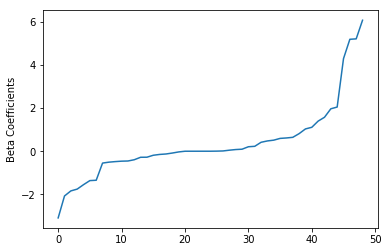

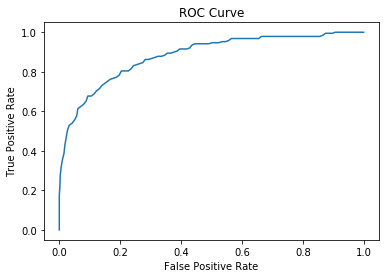

Area Under the Curve: 0.8819457941906927


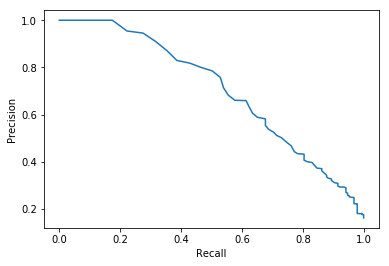

Training Dataset Count: 867
Test Dataset Count: 603


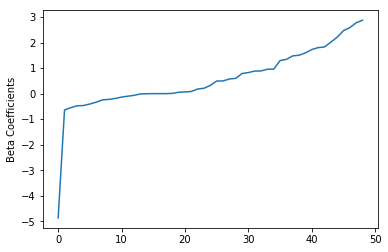

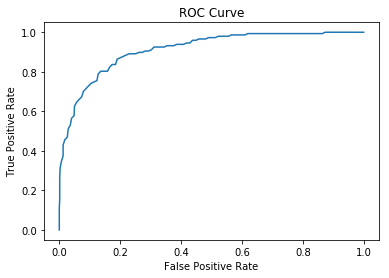

Area Under the Curve: 0.9117961073318209


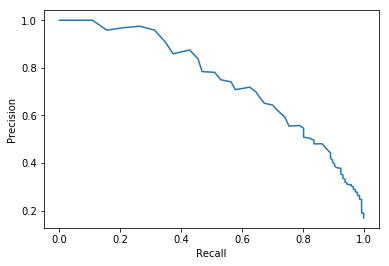

Training Dataset Count: 1021
Test Dataset Count: 449


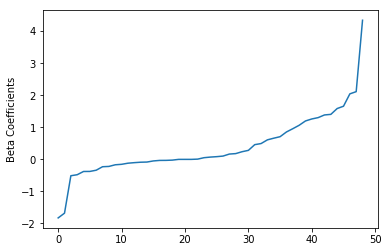

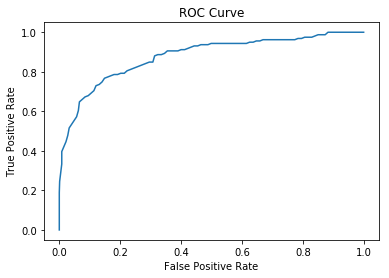

Area Under the Curve: 0.8788505596170962


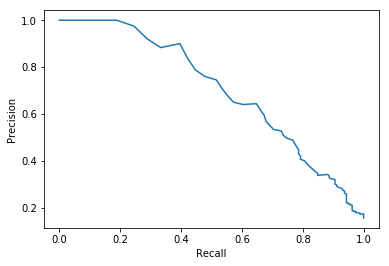

In [44]:
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.8,0.2], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.6,0.4], beta_coffecient = True, roc= True, precision_recall= True)
binomial_logistic_regression(vassembler_emp_normal, splitfrac = [0.7,0.3], beta_coffecient = True, roc= True, precision_recall= True)